#### The loan problem was presented By Analytics Vidhya
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
This notebook is about playing around with this data set and trying more than one classification model, Also I did some feature engineering 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
%matplotlib inline

In [3]:
location = 'Datasets/loans-competition/'

In [314]:
train_data = pd.read_csv(location+'train.csv')
test_data = pd.read_csv(location+'test.csv')

In [5]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
for col in train_data.columns:
    if train_data[col].values.dtype == 'object' and col != 'Loan_ID':
        print train_data[col].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FFC7C18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010412898>]], dtype=object)

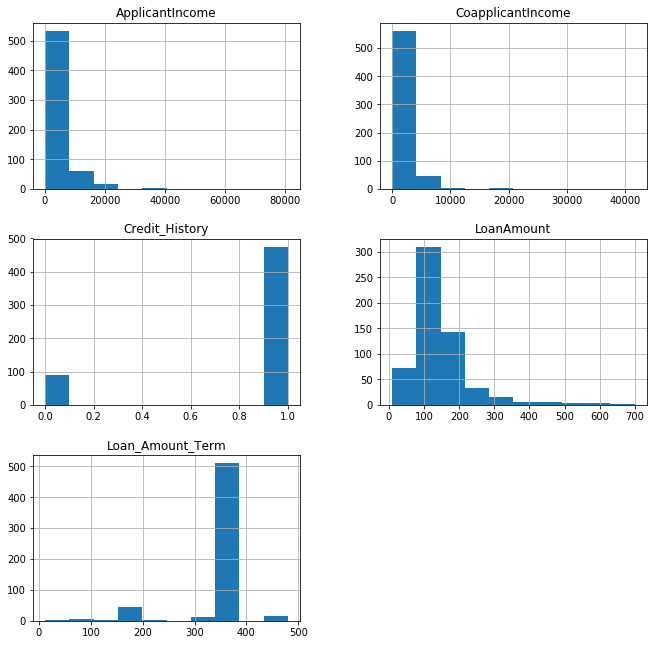

In [8]:
train_data[train_data.dtypes[(train_data.dtypes != 'object')].index.values].hist(figsize=[11,11])

In [9]:
#train_data.boxplot(column='LoanAmount', by = 'Gender', figsize=[11,11])

In [10]:
train_data['Dependents']

0        0
1        1
2        0
3        0
4        0
5        2
6        0
7       3+
8        2
9        1
10       2
11       2
12       2
13       0
14       2
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       0
23       2
24       1
25       0
26       0
27       2
28       0
29       2
      ... 
584      1
585      1
586      0
587      0
588      0
589      2
590      0
591      2
592     3+
593      0
594      0
595      0
596      2
597    NaN
598      0
599      2
600     3+
601      0
602     3+
603      0
604      1
605      0
606      1
607      2
608      0
609      0
610     3+
611      1
612      2
613      0
Name: Dependents, Length: 614, dtype: object

In [11]:
train_data['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

In [12]:
# getting how many features have missing values 
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
train_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [14]:
train_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [15]:
train_data['Gender'].fillna('Male', inplace = True)
train_data['Married'].fillna('Yes', inplace= True)
train_data['Dependents'].fillna('0', inplace = True)
train_data['Self_Employed'].fillna('No', inplace = True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace = True)
train_data['Loan_Amount_Term'].fillna(360.0, inplace = True)
train_data['Credit_History'].fillna(1.0, inplace= True)

In [16]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
X_train = train_data
Y_train = train_data['Loan_Status']

In [18]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [20]:
X_train.drop('Loan_Status',axis=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban


In [21]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_model1 = KNeighborsClassifier(n_neighbors = 5)

In [23]:
knn_model1.fit(X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']], Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, knn_model1.predict(X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']]))

0.72964169381107491

In [214]:
from sklearn import tree

tree_model1 = tree.DecisionTreeClassifier(min_samples_split=20, random_state=99)

In [220]:
tree_model1.fit(X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']], Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [221]:
accuracy_score(Y_train, tree_model1.predict(X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']]))

0.87947882736156346

In [217]:
predictors = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Credit_History']

In [218]:
predicted = tree_model1.predict(test_data[predictors])

In [219]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
train_data['Loan_Status'].replace(('Y','N'), (1,0), inplace = True)
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [73]:
tree_model_credit_history = tree.DecisionTreeClassifier()
tree_model_credit_history.fit(train_data[['ApplicantIncome','CoapplicantIncome','LoanAmount']], train_data['Credit_History'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
tree_test_data = test_data

In [75]:
tree_test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [76]:
i = test_data[(test_data['Credit_History'].isnull())].index
print i

Int64Index([  3,  12,  26,  28,  45,  90,  99, 104, 115, 139, 143, 164, 177,
            179, 185, 202, 220, 259, 262, 265, 282, 286, 305, 329, 336, 351,
            358, 360, 364],
           dtype='int64')


In [71]:
tree_test_data[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Credit_History']].ix[i]

c:\users\ahmed\ml\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
3,2340,2546,100.0,NaN
12,4166,0,40.0,NaN
26,4363,1250,140.0,NaN
28,3772,833,57.0,NaN
45,4260,3900,185.0,NaN
90,3188,2286,130.0,NaN
99,6835,0,188.0,NaN
104,2243,2233,107.0,NaN
115,4243,4123,157.0,NaN
139,4083,0,103.0,NaN


In [79]:
predictions_Credit_History = tree_model_credit_history.predict(test_data[['ApplicantIncome','CoapplicantIncome', 'LoanAmount']].ix[i])

c:\users\ahmed\ml\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [81]:
tree_test_data['Credit_History'][i] = predictions_Credit_History

c:\users\ahmed\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
tree_test_data['Credit_History'][i]

3      0.0
12     1.0
26     1.0
28     1.0
45     1.0
90     1.0
99     1.0
104    1.0
115    1.0
139    1.0
143    1.0
164    1.0
177    1.0
179    1.0
185    0.0
202    1.0
220    1.0
259    1.0
262    1.0
265    0.0
282    0.0
286    1.0
305    1.0
329    0.0
336    0.0
351    1.0
358    1.0
360    1.0
364    1.0
Name: Credit_History, dtype: float64

In [335]:
tree_test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [86]:
i = test_data[(tree_test_data['LoanAmount'].isnull())].index
tree_test_data[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Credit_History']].ix[i]

c:\users\ahmed\ml\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
78,3413,4053,NaN,1.0
101,2262,0,NaN,0.0
188,13083,0,NaN,1.0
247,10000,0,NaN,1.0
289,8333,4000,NaN,1.0


In [89]:
from sklearn import linear_model
linear_model_LoanAmount = linear_model.LinearRegression()
linear_model_LoanAmount.fit(train_data[['ApplicantIncome','CoapplicantIncome','Credit_History']], train_data['LoanAmount'])
predictions_LoanAmount = linear_model_LoanAmount.predict(tree_test_data[['ApplicantIncome','CoapplicantIncome', 'Credit_History']].ix[i])
tree_test_data['LoanAmount'][i] = predictions_LoanAmount

c:\users\ahmed\ml\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
c:\users\ahmed\ml\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [90]:
tree_test_data['LoanAmount'][i]

78     148.298217
101    107.305540
188    197.605993
247    172.340368
289    188.226811
Name: LoanAmount, dtype: float64

In [91]:
tree_test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
dtype: int64

In [94]:
tree_test_data['Loan_Amount_Term'].fillna(360.0, inplace = True)

In [95]:
tree_test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [222]:
test_set_tree_model_predictions = tree_model1.predict(tree_test_data[['ApplicantIncome','CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']])

In [223]:
test_set_tree_model_predictions

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0,

In [224]:
tree_test_data['Loan_Status'] = test_set_tree_model_predictions

In [120]:
import sklearn.linear_model
logistic_model = linear_model.LogisticRegression()
logistic_model.fit(train_data[['ApplicantIncome','CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']], train_data['Loan_Status'])
accuracy_score(Y_train, logistic_model.predict(train_data[['ApplicantIncome','CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']]))

0.81270358306188928

In [121]:
logistic_predictions = logistic_model.predict(tree_test_data[['ApplicantIncome','CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']])

In [127]:
df = pd.DataFrame(logistic_predictions)
df.replace((1,0),('Y','N'), inplace= True)
logistic_test_set = tree_test_data
logistic_test_set['Loan_Status'] = df

In [128]:
logistic_test_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban,N
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [129]:
logistic_test_set.to_csv("Submission2.csv",columns=['Loan_ID','Loan_Status'], index= False)

In [136]:
combine_logistic_tree = logistic_test_set

In [151]:
for i in xrange(0,len(logistic_test_set)):
    if logistic_test_set['Loan_Status'][i] == 'N':
        combine_logistic_tree['Loan_Status'][i] = tree_test_data['Loan_Status'][i]

c:\users\ahmed\ml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [154]:
combine_logistic_tree.to_csv("Submission3.csv",columns=['Loan_ID','Loan_Status'], index= False)

In [202]:
knn_model_loan = KNeighborsClassifier(n_neighbors = 3)
knn_model_loan.fit(train_data[['ApplicantIncome','CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']], train_data['Loan_Status'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [187]:
knn_loan_predictions = knn_model_loan.predict( test_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
                                                                                    'Credit_History']])

In [188]:
df_knn = pd.DataFrame(knn_loan_predictions)
df_knn.replace((1,0),('Y','N'), inplace= True)
knn_test_data = tree_test_data
knn_test_data['Loan_Status'] = df_knn

In [189]:
knn_test_data.to_csv("Submission4.csv",columns=['Loan_ID','Loan_Status'], index= False)

In [190]:
accuracy_score(Y_train,knn_model_loan.predict(train_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
                                                                                    'Credit_History']]))

0.77687296416938112

### going to make some feature scalling for the set to get higher accuracy from knn

In [205]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_train_minmax=min_max.fit_transform(train_data[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax=min_max.fit_transform(test_data[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

In [206]:
knn_model_loan.fit(X_train_minmax, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [207]:
accuracy_score(Y_train,knn_model_loan.predict(X_train_minmax))

0.85993485342019549

In [211]:
knn_loan_predictions = knn_model_loan.predict(X_test_minmax)

In [212]:
df_knn = pd.DataFrame(knn_loan_predictions)
df_knn.replace((1,0),('Y','N'), inplace= True)
knn_test_data = tree_test_data
knn_test_data['Loan_Status'] = df_knn

In [213]:
knn_test_data.to_csv("Submission5.csv",columns=['Loan_ID','Loan_Status'], index= False)

In [ ]:
tree_model1.fit(X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']], Y_train)

In [226]:
tree_test_data['Loan_Status'].replace((1,0),('Y','N'), inplace= True)

In [227]:
tree_test_data.to_csv("Submission6.csv",columns=['Loan_ID','Loan_Status'], index= False)

In [231]:
for i in xrange(0,len(logistic_test_set)):
    yes = 0
    no = 0
    if logistic_test_set['Loan_Status'][i] == 'Y':
        yes +=1
    else:
        no +=1
    if tree_test_data['Loan_Status'][i] == 'Y':
        yes+=1
    else:
        no+=1
    if knn_test_data['Loan_Status'][i] == 'Y':
        yes +=1
    else:
        no +=1
    if yes > no:
        combine_logistic_tree['Loan_Status'][i] = 'Y'
    else:
        combine_logistic_tree['Loan_Status'][i] = 'N'

c:\users\ahmed\ml\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\ahmed\ml\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [232]:
combine_logistic_tree.to_csv("Submission7.csv",columns=['Loan_ID','Loan_Status'], index= False)

## Train model using the logistic regression result

In [236]:
logistic_model.fit(logistic_test_set[['ApplicantIncome','CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']], logistic_test_set['Loan_Status'])
logistic_predictions = logistic_model.predict(logistic_test_set[['ApplicantIncome','CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']])

In [237]:
accuracy_score(logistic_predictions, logistic_model.predict(logistic_test_set[['ApplicantIncome','CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']]) )

1.0

In [238]:
df = pd.DataFrame(logistic_predictions)
df.replace((1,0),('Y','N'), inplace= True)
logistic_test_set = tree_test_data
logistic_test_set['Loan_Status'] = df

In [239]:
logistic_test_set.to_csv("Submission8.csv",columns=['Loan_ID','Loan_Status'], index= False)

In [242]:
knn_model_loan.fit(X_test_minmax, logistic_test_set['Loan_Status'])
knn_loan_predictions = knn_model_loan.predict(X_test_minmax)
df_knn = pd.DataFrame(knn_loan_predictions)
df_knn.replace((1,0),('Y','N'), inplace= True)
knn_test_data = tree_test_data
knn_test_data['Loan_Status'] = df_knn
accuracy_score(logistic_test_set['Loan_Status'],knn_model_loan.predict(X_test_minmax))

1.0

In [254]:
tree_model1.fit(test_data[['ApplicantIncome','CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']], logistic_test_set['Loan_Status'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [258]:
p = tree_model1.predict(test_data[['ApplicantIncome','CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']])
tree_df = pd.DataFrame(p)
tree_df.replace((1,0), ('Y','N'), inplace = True)
tree_test_data['Loan_Status'] = tree_df
accuracy_score(logistic_test_set['Loan_Status'], p )

1.0

In [256]:
for i in xrange(0,len(logistic_test_set)):
    yes = 0
    no = 0
    if logistic_test_set['Loan_Status'][i] == 'Y':
        yes +=1
    else:
        no +=1
    if tree_test_data['Loan_Status'][i] == 'Y':
        yes+=1
    else:
        no+=1
    if knn_test_data['Loan_Status'][i] == 'Y':
        yes +=1
    else:
        no +=1
    if yes > no:
        combine_logistic_tree['Loan_Status'][i] = 'Y'
    else:
        combine_logistic_tree['Loan_Status'][i] = 'N'

c:\users\ahmed\ml\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\ahmed\ml\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [259]:
combine_logistic_tree.to_csv("Submission9.csv",columns=['Loan_ID','Loan_Status'], index= False)

# creating dummy data for categorical features

In [261]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [264]:
train_data_modified = train_data

In [265]:
train_data_modified['Gender'].replace(('Male','Female'), (1,0), inplace = True)
train_data_modified['Married'].replace(('Yes','No'), (1,0), inplace = True)
train_data_modified['Education'].replace(('Graduate','Not Graduate'), (1,0), inplace = True)
train_data_modified['Self_Employed'].replace(('Yes','No'), (1,0), inplace = True)

In [268]:
train_data_modified['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [274]:
train_data_modified.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [283]:
Property_Area = pd.get_dummies(train_data_modified['Property_Area'])
Dependents = pd.get_dummies(train_data_modified['Dependents'])
train_data_modified = train_data_modified.join(Property_Area)
train_data_modified = train_data_modified.join(Dependents)

In [288]:
train_data_modified = train_data_modified.drop(['Loan_Amount_Term','Property_Area', 'Dependents'], axis=1)

In [291]:
train_data_modified = train_data_modified.drop('Loan_ID', axis = 1)

In [292]:
train_data_modified.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Rural,Semiurban,Urban,0,1,2,3+
0,1,0,1,0,5849,0.0,146.412162,1.0,1,0,0,1,1,0,0,0
1,1,1,1,0,4583,1508.0,128.000000,1.0,0,1,0,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.000000,1.0,1,0,0,1,1,0,0,0
3,1,1,0,0,2583,2358.0,120.000000,1.0,1,0,0,1,1,0,0,0
4,1,0,1,0,6000,0.0,141.000000,1.0,1,0,0,1,1,0,0,0


In [301]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [300]:
test_data['Self_Employed'].fillna('No', inplace = True)
test_data['Gender'].fillna('Male', inplace = True)
test_data['Dependents'].fillna(0, inplace = True)

In [415]:
import numpy as np
trial_set = train_data_modified
trial_set['total'] = np.log(trial_set['ApplicantIncome'] + trial_set['CoapplicantIncome'])
trial_set['new_LoanAmount'] = np.log(trial_set['LoanAmount'])

In [416]:
test_trial = test_data_modified
test_trial['total'] = np.log(test_trial['ApplicantIncome'] + test_trial['CoapplicantIncome'])
test_trial['new_LoanAmount'] = np.log(test_trial['LoanAmount'])

In [365]:
train_data_modified.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Rural,Semiurban,Urban,0,1,2,3+
0,1,0,1,0,5849,0.0,146.412162,1.0,1,0,0,1,1,0,0,0
1,1,1,1,0,4583,1508.0,128.000000,1.0,0,1,0,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.000000,1.0,1,0,0,1,1,0,0,0
3,1,1,0,0,2583,2358.0,120.000000,1.0,1,0,0,1,1,0,0,0
4,1,0,1,0,6000,0.0,141.000000,1.0,1,0,0,1,1,0,0,0


In [425]:
predictors = ['Gender', 'Married', 'Education', 'Self_Employed','ApplicantIncome',
              'CoapplicantIncome','LoanAmount','Credit_History','Rural', 'Semiurban', 'Urban','total','new_LoanAmount']

In [426]:
logistic_model_modified = linear_model.LogisticRegression()
logistic_model_modified.fit(trial_set[predictors], Y_train)
accuracy_score(Y_train, logistic_model_modified.predict(trial_set[predictors]))

0.81270358306188928

In [341]:
test_data_modified = tree_test_data

In [346]:
test_data_modified.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,0.0,Urban,N
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,Urban,Y


In [344]:
test_data_modified = pd.DataFrame(test_data_modified)

In [347]:
#test_data_modified['Gender'].replace(('Male','Female'), (1,0), inplace = True)
#test_data_modified['Married'].replace(('Yes','No'), (1,0), inplace = True)
#test_data_modified['Education'].replace(('Graduate','Not Graduate'), (1,0), inplace = True)
#test_data_modified['Self_Employed'].replace(('Yes','No'), (1,0), inplace = True)

Property_Area = pd.get_dummies(test_data_modified['Property_Area'])
Dependents = pd.get_dummies(test_data_modified['Dependents'])
test_data_modified = test_data_modified.join(Property_Area)
test_data_modified = test_data_modified.join(Dependents)

test_data_modified = test_data_modified.drop(['Loan_Amount_Term','Property_Area', 'Dependents', 'Loan_ID'], axis=1)

In [348]:
test_data_modified.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Loan_Status          0
Rural                0
Semiurban            0
Urban                0
0                    0
0                    0
1                    0
2                    0
3+                   0
dtype: int64

In [353]:
test_data_modified = test_data_modified.drop(['Loan_Status'], axis =1)

In [427]:
loans_ID = test_data['Loan_ID']
p = logistic_model_modified.predict(test_trial[predictors])
log_df = pd.DataFrame(p) 
log_df.columns = ['Loan_Status']
log_df.replace((1,0), ('Y','N'), inplace= True)
loans_ID = pd.DataFrame(loans_ID)
loans_ID =loans_ID.join(log_df)

In [428]:
p

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1,

In [429]:
loans_ID.to_csv("Submission11.csv",columns=['Loan_ID','Loan_Status'], index= False)

In [66]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban


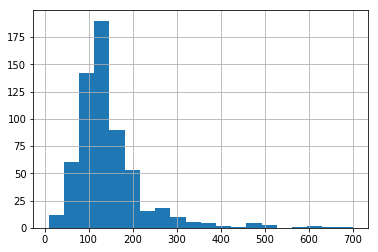

In [26]:
train_data['LoanAmount'].hist(bins=20)

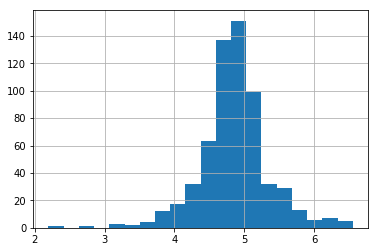

In [99]:
import numpy as np
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
train_data['LoanAmount_log'].hist(bins=20)

In [100]:
train_data['Gender'].fillna('Male', inplace = True)

In [101]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()

train_data['Gender'] = number.fit_transform(train_data['Gender'].astype(str))
# this going to make the gender col use binary 1 and 0 instead of Male and Female

In [63]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760


In [89]:
train_data['Married'].fillna('Yes', inplace = True)
train_data['Married_new'] = number.fit_transform(train_data['Married'].astype(str))

0       No
1      Yes
2      Yes
3      Yes
4       No
5      Yes
6      Yes
7      Yes
8      Yes
9      Yes
10     Yes
11     Yes
12     Yes
13      No
14     Yes
15      No
16      No
17      No
18     Yes
19     Yes
20     Yes
21     Yes
22     Yes
23     Yes
24     Yes
25     Yes
26     Yes
27     Yes
28      No
29      No
      ... 
584    Yes
585    Yes
586    Yes
587     No
588     No
589    Yes
590    Yes
591    Yes
592     No
593    Yes
594    Yes
595     No
596    Yes
597     No
598    Yes
599    Yes
600     No
601    Yes
602    Yes
603     No
604    Yes
605    Yes
606    Yes
607    Yes
608    Yes
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object

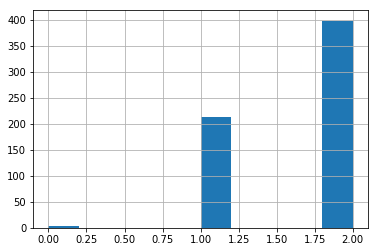

In [88]:
train_data['Married_new'].hist()

In [84]:
for i in xrange(len(train_data['Married_new'])):
    if train_data['Married_new'][i] >1:
        print i, train_data['Married_new'][i] 

104 2
228 2
435 2


In [85]:
train_data['Married'][104]

nan

In [ ]:
featimp = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)

print (featimp)

# by model here we means random first model